In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("F:\\Cars (2) (1) (2).csv")
df

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport
...,...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport


# EDA

In [3]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [4]:
df.isna().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [5]:
df.describe(include='all')

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
count,444.000000,444,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Public Transport
freq,NaN,316,NaN,NaN,NaN,NaN,NaN,NaN,300
mean,27.747748,NaN,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234,NaN
std,4.416710,NaN,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997,NaN
min,18.000000,NaN,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000,NaN
25%,25.000000,NaN,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000,NaN
50%,27.000000,NaN,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000,NaN
75%,30.000000,NaN,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000,NaN


In [6]:
df.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [9]:
df.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

In [10]:
df.skew()

C:\Users\Nitin Rathore\AppData\Local\Temp\ipykernel_12104\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age         0.955276
Engineer   -1.186708
MBA         1.144763
Work Exp    1.352840
Salary      2.044533
Distance    0.539851
license     1.259293
dtype: float64

In [11]:
df.corr()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358
Work Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000


# Univariate analysis

In [12]:
df

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport
...,...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport


<AxesSubplot:xlabel='Age', ylabel='Count'>

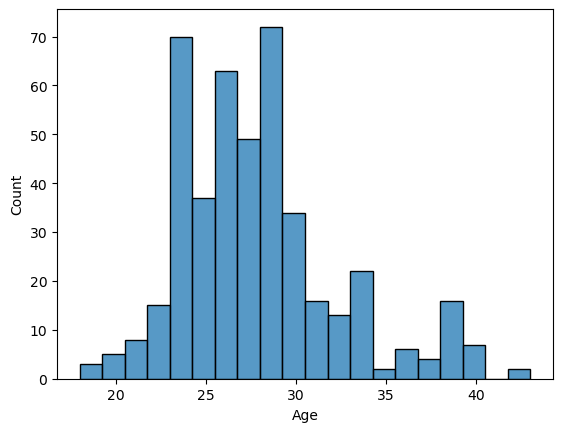

In [13]:
sns.histplot(df['Age'],)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

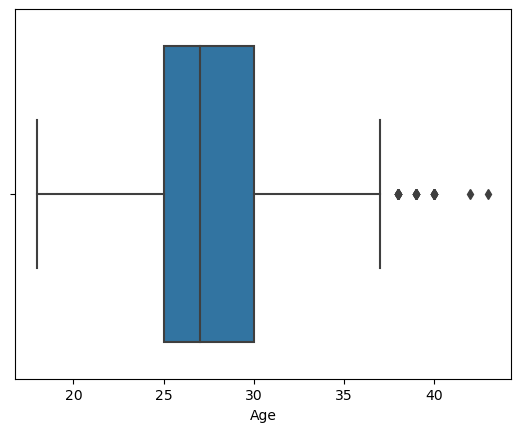

In [14]:
sns.boxplot(df['Age'])

In [15]:
df['Age'].min()

18

In [16]:
df['Age'].max()

43

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

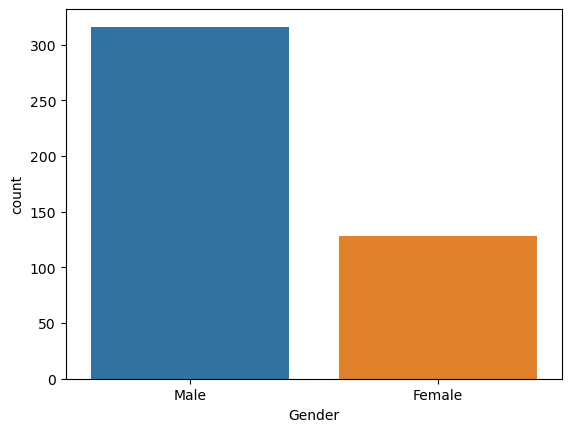

In [17]:
sns.countplot(df['Gender'])

In [18]:
df['Gender'].value_counts()

Male      316
Female    128
Name: Gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engineer', ylabel='count'>

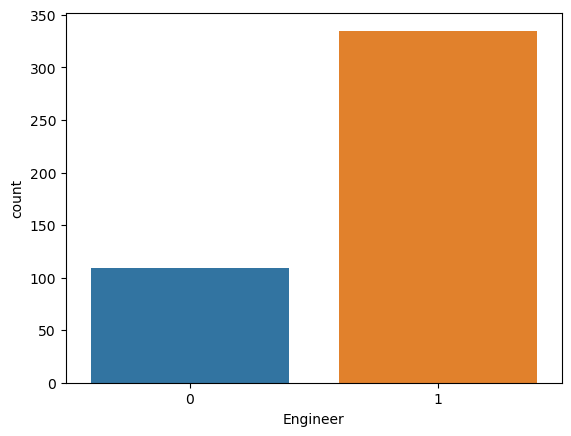

In [19]:
sns.countplot(df['Engineer'])

In [20]:
df['Engineer'].value_counts()

1    335
0    109
Name: Engineer, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MBA', ylabel='count'>

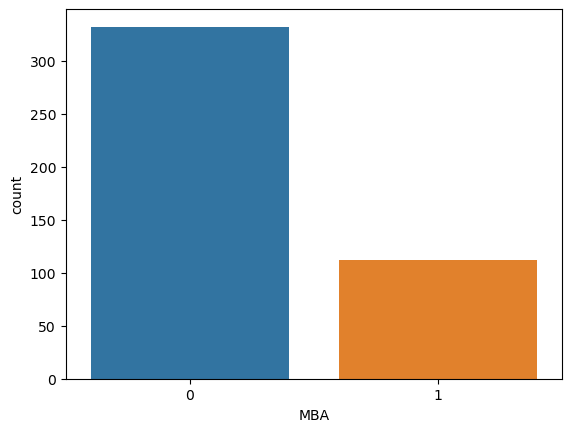

In [21]:
sns.countplot(df['MBA'])

In [22]:
df['MBA'].value_counts()

0    332
1    112
Name: MBA, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Exp', ylabel='count'>

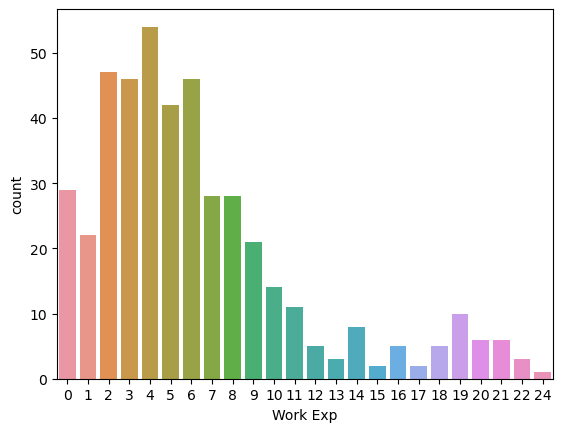

In [23]:
sns.countplot(df['Work Exp'])

In [24]:
df['Work Exp'].value_counts()

4     54
2     47
3     46
6     46
5     42
0     29
7     28
8     28
1     22
9     21
10    14
11    11
19    10
14     8
21     6
20     6
16     5
12     5
18     5
13     3
22     3
17     2
15     2
24     1
Name: Work Exp, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Exp'>

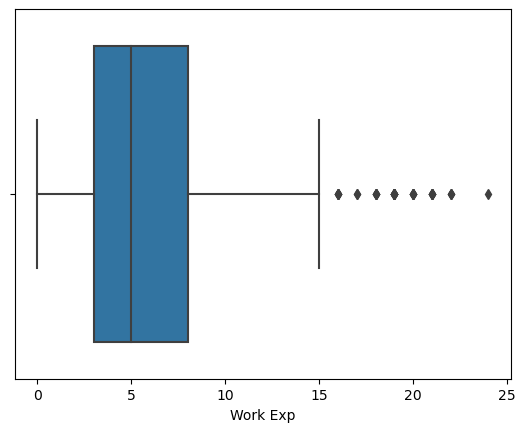

In [25]:
sns.boxplot(df['Work Exp'])

<AxesSubplot:xlabel='count', ylabel='Salary'>

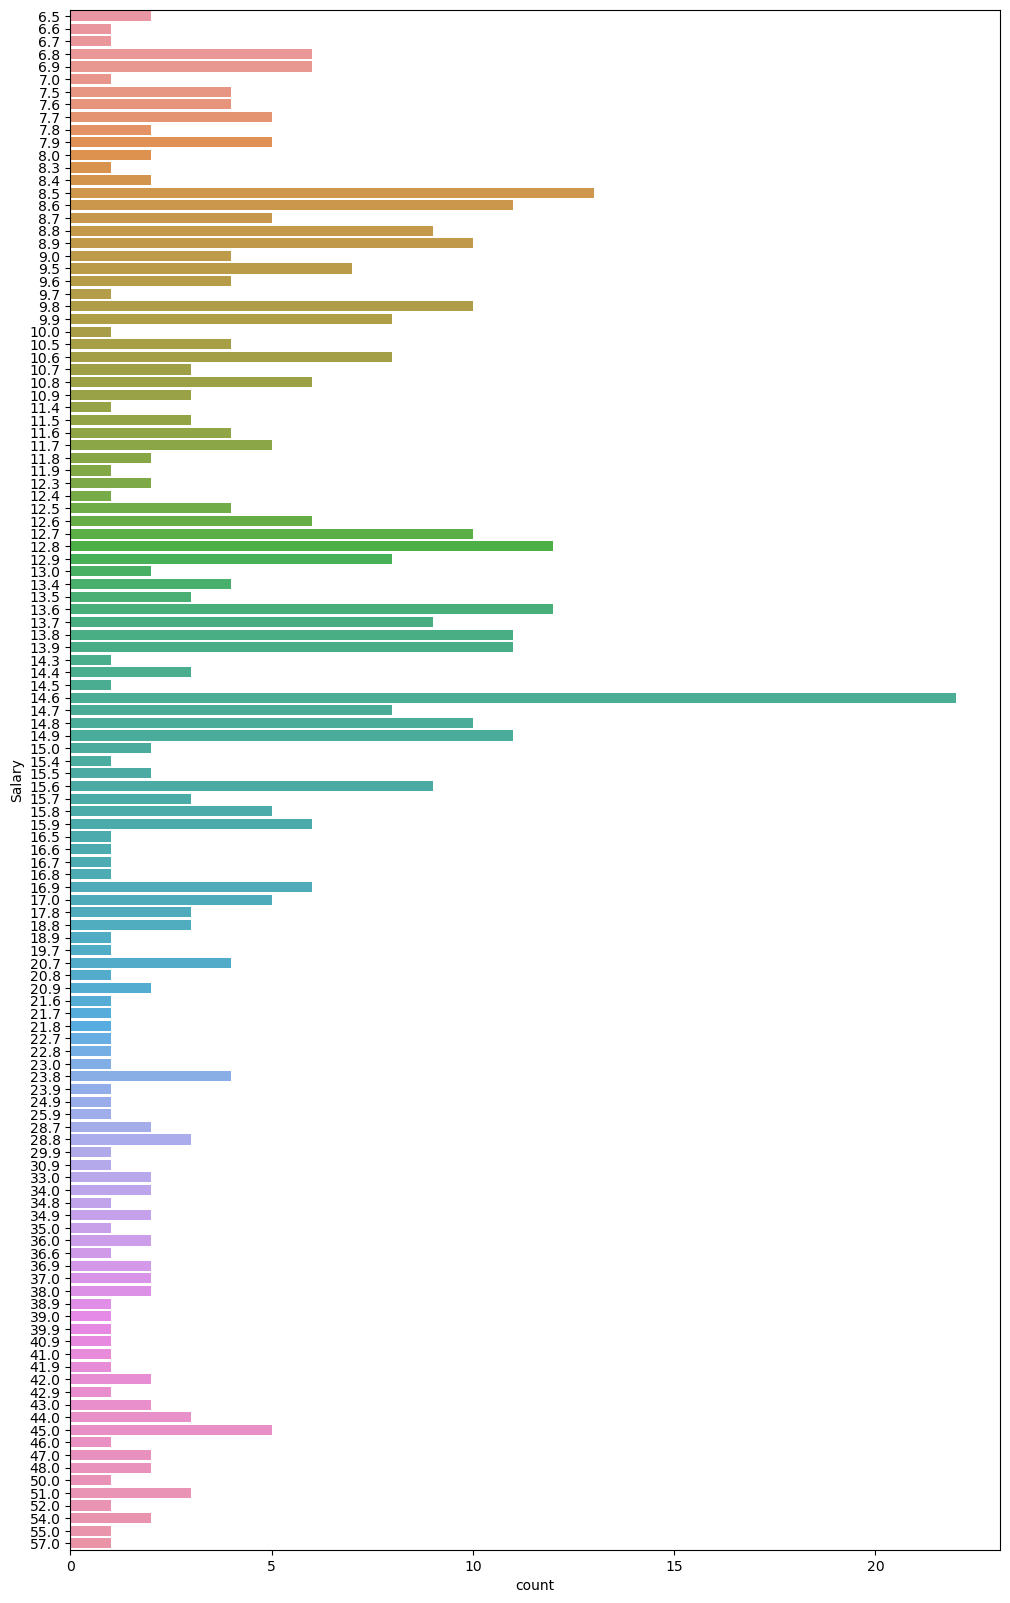

In [26]:
plt.figure(figsize=(12,20))
sns.countplot(y=df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Count'>

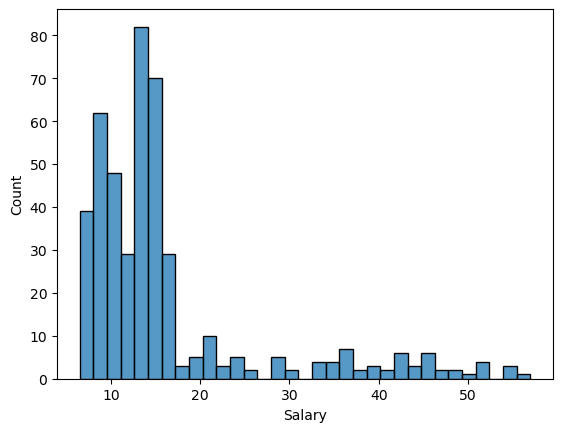

In [27]:
sns.histplot(df['Salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

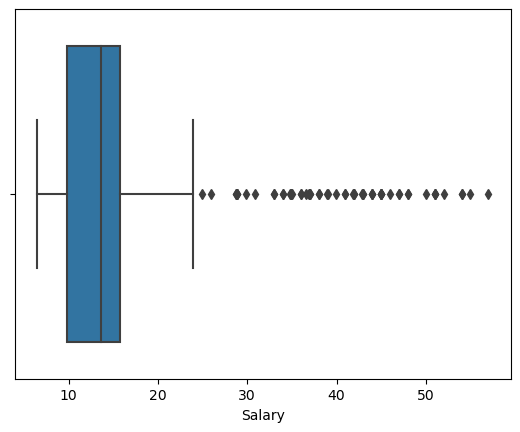

In [28]:
sns.boxplot(df['Salary'])

In [29]:
df['Salary'].min()

6.5

In [30]:
df['Salary'].max()

57.0

<AxesSubplot:xlabel='Distance', ylabel='Count'>

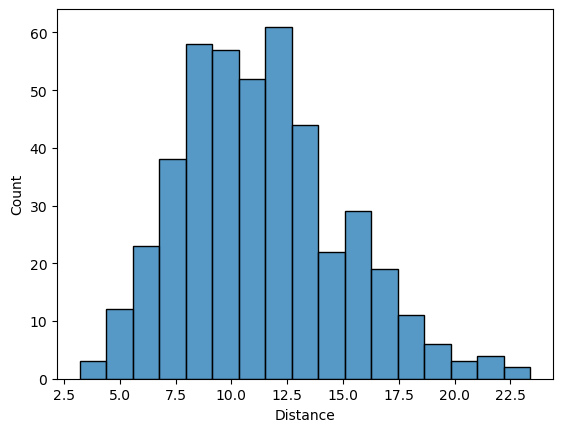

In [31]:
sns.histplot(df['Distance'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

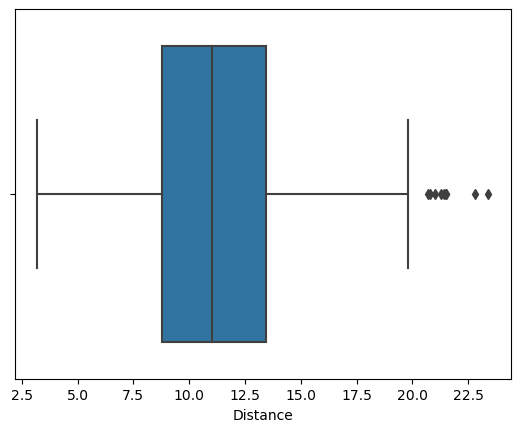

In [32]:
sns.boxplot(df['Distance'])

In [33]:
df['Distance'].min()

3.2

In [34]:
df['Distance'].max()

23.4

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='license', ylabel='count'>

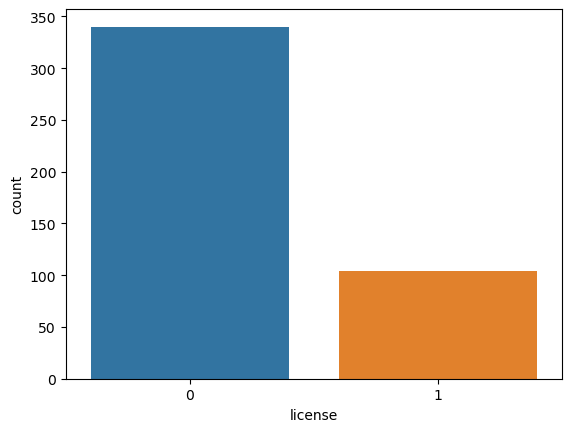

In [35]:
sns.countplot(df['license'])

In [36]:
df['license'].value_counts()

0    340
1    104
Name: license, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transport', ylabel='count'>

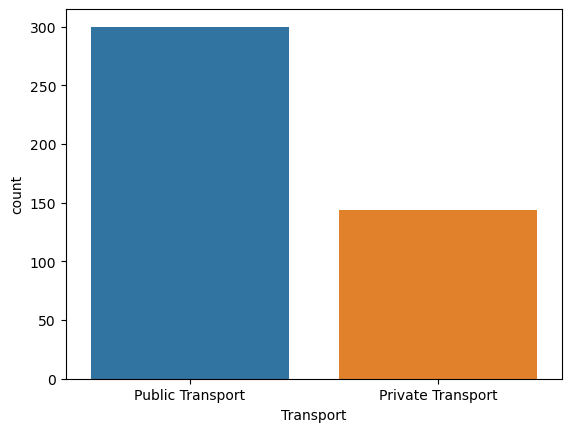

In [37]:
sns.countplot(df['Transport'])

In [38]:
df['Transport'].value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

# Bivariate analysis

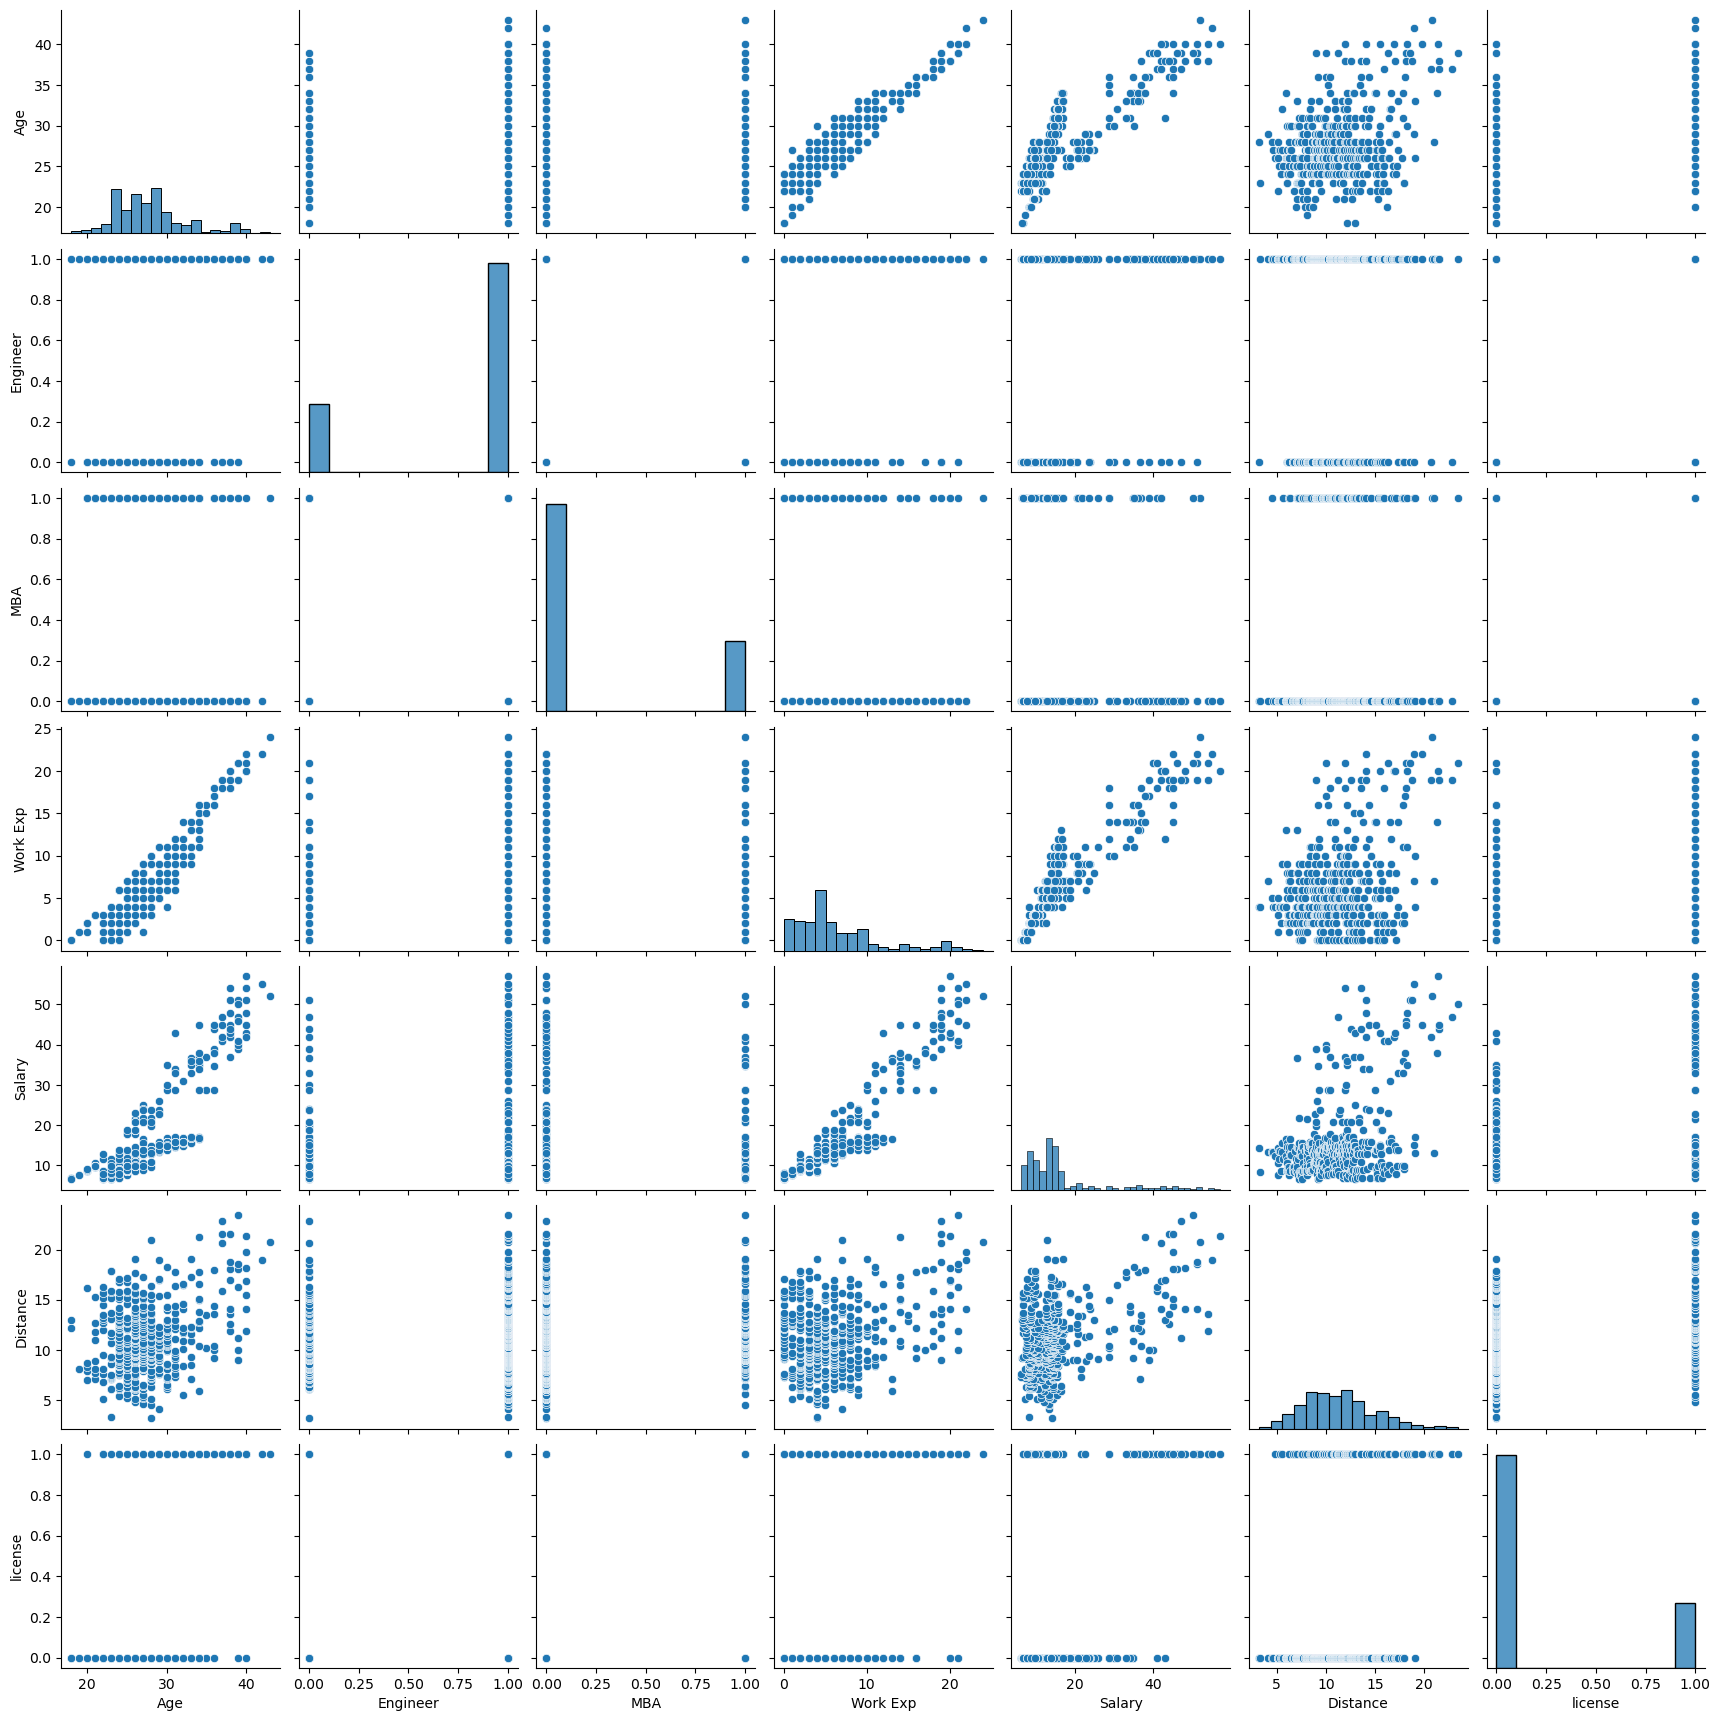

In [39]:
sns.pairplot(df)

In [40]:
df

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport
...,...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport


In [41]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [42]:
df['Transport']=df['Transport'].map({'Public Transport':0,'Private Transport':1})

In [43]:
df_heat = df[['Age','Work Exp','Salary','Distance']]

<AxesSubplot:>

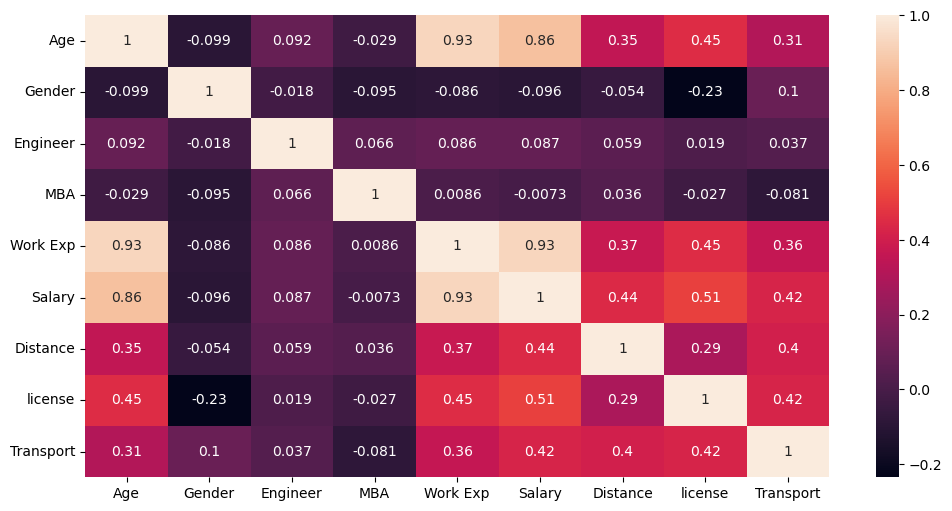

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df.corr(),annot=True,fmt='.2g')

<AxesSubplot:>

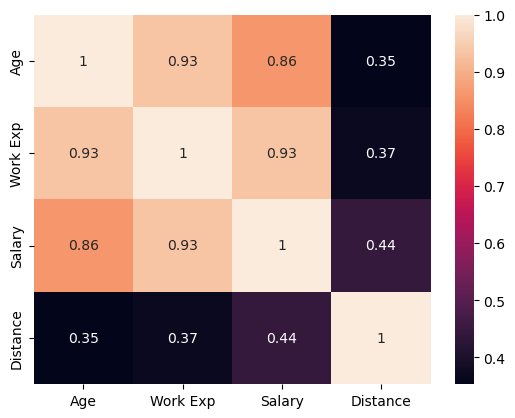

In [45]:
sns.heatmap(data = df_heat.corr(),annot=True,fmt='.2g')

In [46]:
df

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,0,0,0,4,14.3,3.2,0,0
1,23,1,1,0,4,8.3,3.3,0,0
2,29,0,1,0,7,13.4,4.1,0,0
3,28,1,1,1,5,13.4,4.5,0,0
4,27,0,1,0,4,13.4,4.6,0,0
...,...,...,...,...,...,...,...,...,...
439,40,0,1,0,20,57.0,21.4,1,1
440,38,0,1,0,19,44.0,21.5,1,1
441,37,0,1,0,19,45.0,21.5,1,1
442,37,0,0,0,19,47.0,22.8,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Work Exp'>

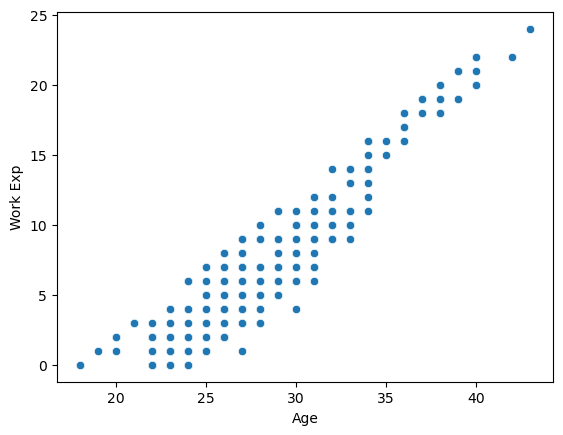

In [47]:
sns.scatterplot(df['Age'],df['Work Exp'])

In [48]:
X = df.iloc[:,:-1]

In [49]:
X

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,28,0,0,0,4,14.3,3.2,0
1,23,1,1,0,4,8.3,3.3,0
2,29,0,1,0,7,13.4,4.1,0
3,28,1,1,1,5,13.4,4.5,0
4,27,0,1,0,4,13.4,4.6,0
...,...,...,...,...,...,...,...,...
439,40,0,1,0,20,57.0,21.4,1
440,38,0,1,0,19,44.0,21.5,1
441,37,0,1,0,19,45.0,21.5,1
442,37,0,0,0,19,47.0,22.8,1


In [50]:
y = df.iloc[::,-1]

In [51]:
y

0      0
1      0
2      0
3      0
4      0
      ..
439    1
440    1
441    1
442    1
443    1
Name: Transport, Length: 444, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=1234)

In [54]:
X_train

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
176,36,0,0,0,17,39.0,10.0,1
227,26,1,1,0,4,12.9,11.1,0
436,43,0,1,1,24,52.0,20.8,1
110,27,0,1,1,5,13.5,8.8,0
418,26,0,1,1,2,9.9,17.7,0
...,...,...,...,...,...,...,...,...
204,27,0,0,1,8,20.7,10.7,0
53,23,0,0,0,0,6.5,7.3,0
294,24,1,1,1,1,8.8,12.6,1
211,25,0,1,0,3,10.7,10.8,0


In [55]:
y_train

176    1
227    1
436    1
110    0
418    0
      ..
204    0
53     1
294    1
211    0
303    0
Name: Transport, Length: 297, dtype: int64

# LOGISTIC REGRESSION WITH BEST PARAM

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
from sklearn.model_selection import GridSearchCV

In [58]:
parameter={'penalty':['l1','l2','elasticnet','l3'],'C':[1,2,3,4,5,6,10,20,30,40,50,7,8,9],'max_iter':[100,200,300,50,400,500]}

In [59]:
classifier_regressor = GridSearchCV(classification,parameter,cv=10)

In [60]:
classifier_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2520 fits failed out of a total of 3360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
840 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 7, 8, 9],
                         'max_iter': [100, 200, 300, 50, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'l3']})

In [61]:
classifier_regressor.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [62]:
classifier_regressor.best_score_

0.8183908045977013

In [63]:
#predection
y_pred=classifier_regressor.predict(X_test)

In [64]:
from sklearn import metrics
print(classification_report(y_pred,y_test))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       102
           1       0.59      0.71      0.65        45

    accuracy                           0.76       147
   macro avg       0.73      0.75      0.73       147
weighted avg       0.78      0.76      0.77       147

[[80 13]
 [22 32]]


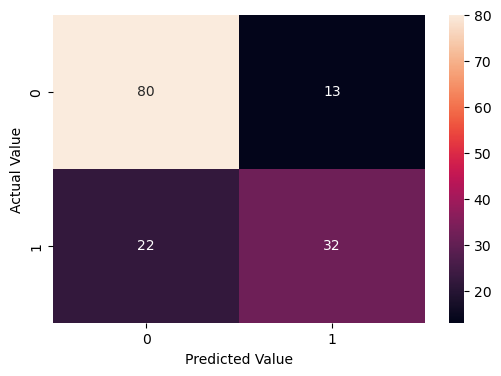

In [65]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

# LOGISTIC REGRESSION

In [66]:
from sklearn import metrics
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_predict = model_log.predict(X_test)
model_score = model_log.score(X_test, y_test)
print('model_score:', model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

model_score: 0.7619047619047619
[[80 13]
 [22 32]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        93
           1       0.71      0.59      0.65        54

    accuracy                           0.76       147
   macro avg       0.75      0.73      0.73       147
weighted avg       0.76      0.76      0.76       147



In [67]:
model_log.score(X_test, y_test)

0.7619047619047619

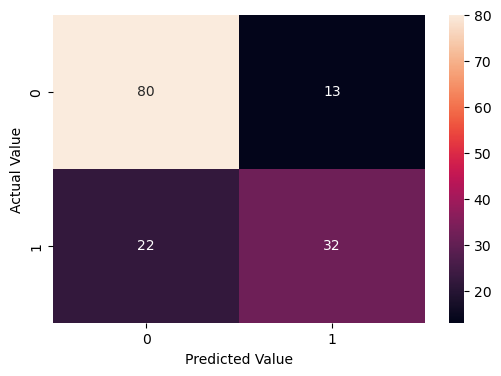

In [68]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

# LDA

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
LDA = LinearDiscriminantAnalysis()
model_LDA = LDA.fit(X_train,y_train)
model_LDA

LinearDiscriminantAnalysis()

In [71]:
LDA_pred = model_LDA.predict(X_test)

In [72]:
model_LDA.score(X_test,y_test)

0.7551020408163265

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LDA_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        93
           1       0.70      0.57      0.63        54

    accuracy                           0.76       147
   macro avg       0.74      0.72      0.72       147
weighted avg       0.75      0.76      0.75       147



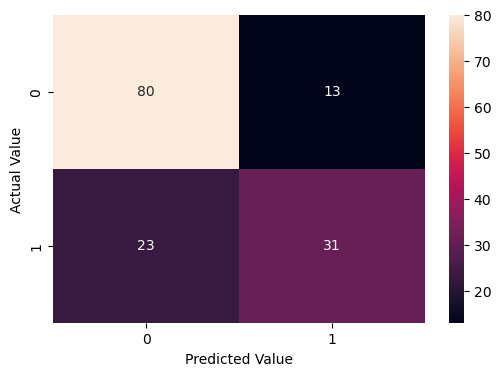

In [74]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, LDA_pred),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# DECISION TREE CLASSIFIER

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc_cla = DecisionTreeClassifier()

In [76]:
dtc_cla.fit(X_train,y_train).score(X_test,y_test)

0.8095238095238095

In [77]:
y_pred_dtc = dtc_cla.predict(X_test)

In [78]:
print(confusion_matrix(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))

[[78 15]
 [13 41]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        93
           1       0.73      0.76      0.75        54

    accuracy                           0.81       147
   macro avg       0.79      0.80      0.80       147
weighted avg       0.81      0.81      0.81       147



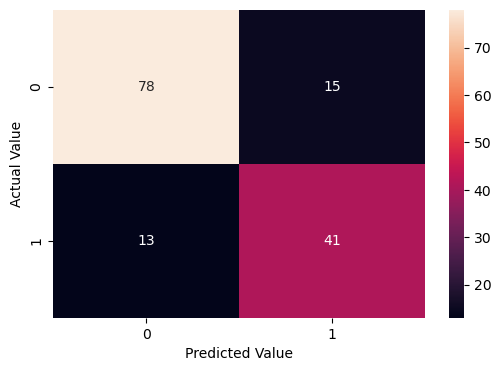

In [79]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_dtc),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# Naïve Bayes Model

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
GNB_model = GaussianNB()

In [82]:
GNB_model.fit(X_train,y_train).score(X_test,y_test)

0.7482993197278912

In [83]:
y_pred_GNB = GNB_model.predict(X_test)

In [84]:
print(confusion_matrix(y_test,y_pred_GNB))
print(classification_report(y_test,y_pred_GNB))

[[76 17]
 [20 34]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        93
           1       0.67      0.63      0.65        54

    accuracy                           0.75       147
   macro avg       0.73      0.72      0.73       147
weighted avg       0.75      0.75      0.75       147



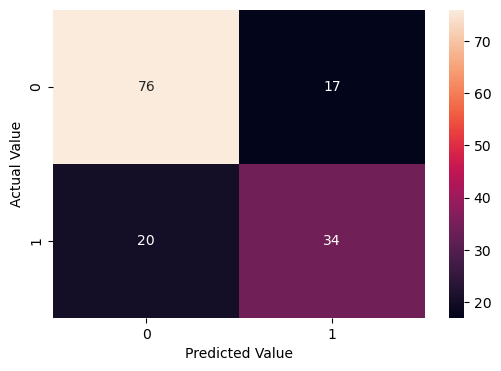

In [85]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_GNB),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
KNN_CLASSIFIER = KNeighborsClassifier(n_neighbors=5)
KNN_CLASSIFIER.fit(X_train,y_train).score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.782312925170068

In [88]:
y_pred_knn = KNN_CLASSIFIER.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        93
           1       0.76      0.59      0.67        54

    accuracy                           0.78       147
   macro avg       0.78      0.74      0.75       147
weighted avg       0.78      0.78      0.78       147

[[83 10]
 [22 32]]


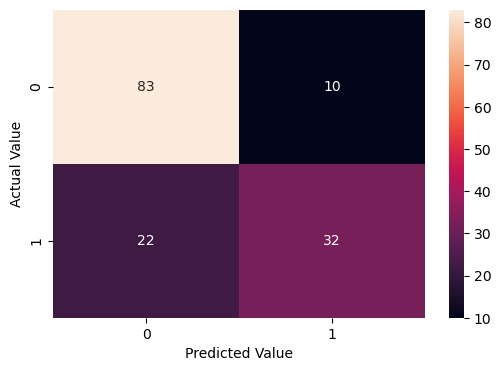

In [90]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# RANDOM FOREST CLASSIFIER

In [91]:
from sklearn.ensemble import RandomForestClassifier
RFC_model =  RandomForestClassifier()

In [92]:
RFC_model.fit(X_train,y_train).score(X_test,y_test)

0.8299319727891157

In [93]:
y_pred_RFC = RFC_model.predict(X_test)

In [94]:
print(confusion_matrix(y_test,y_pred_RFC))
print(classification_report(y_test,y_pred_RFC))

[[84  9]
 [16 38]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        93
           1       0.81      0.70      0.75        54

    accuracy                           0.83       147
   macro avg       0.82      0.80      0.81       147
weighted avg       0.83      0.83      0.83       147



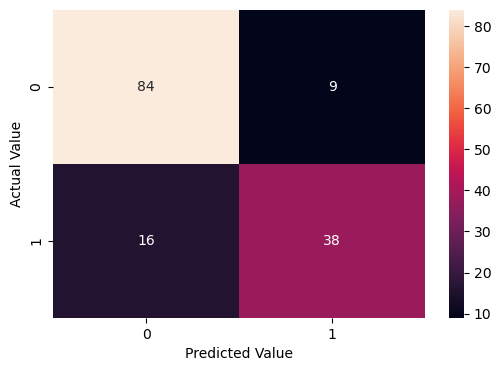

In [95]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_RFC),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# BOOSTING CLASSIFIER WITH GRADIENT BOOSTING

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
GRA_model = GradientBoostingClassifier()

In [98]:
GRA_model.fit(X_train,y_train).score(X_test,y_test)

0.7891156462585034

In [99]:
GNB_pred = GRA_model.predict(X_test)

In [100]:
print(confusion_matrix(y_test,GNB_pred))
print(classification_report(y_test,GNB_pred))

[[81 12]
 [19 35]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        93
           1       0.74      0.65      0.69        54

    accuracy                           0.79       147
   macro avg       0.78      0.76      0.77       147
weighted avg       0.79      0.79      0.79       147



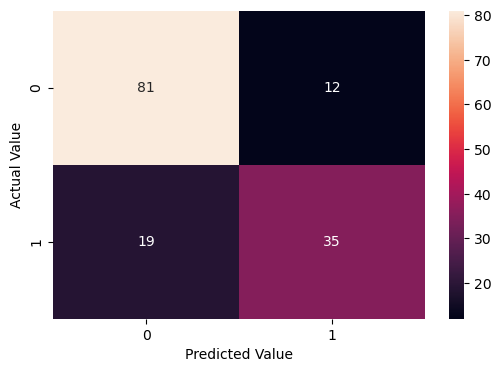

In [101]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,GNB_pred),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# ROC_AUC SCORE

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [103]:
classifier_regressor_prob=classifier_regressor.predict_proba(X_test)
model_log_prob = model_log.predict_proba(X_test)
model_LDA_prob = model_LDA.predict_proba(X_test)
dtc_cla_prob = dtc_cla.predict_proba(X_test)
GNB_model_prob = GNB_model.predict_proba(X_test)
KNN_CLASSIFIER_prob = KNN_CLASSIFIER.predict_proba(X_test) 
RFC_model_prob = RFC_model.predict_proba(X_test)
GRA_model_prob = GRA_model.predict_proba(X_test)

In [104]:
roc_auc_score(y_test, classifier_regressor.predict_proba(X_test)[:, 1])

0.7680207088809239

In [105]:
roc_auc_score(y_test,model_log.predict_proba(X_test)[:, 1])

0.7680207088809239

In [106]:
roc_auc_score(y_test,model_LDA.predict_proba(X_test)[:, 1])

0.7668259657506971

In [107]:
roc_auc_score(y_test,dtc_cla.predict_proba(X_test)[:, 1])

0.7989844683393071

In [108]:
roc_auc_score(y_test,GNB_model.predict_proba(X_test)[:, 1])

0.7447232178414974

In [109]:
roc_auc_score(y_test,KNN_CLASSIFIER.predict_proba(X_test)[:, 1])

0.7841497411389884

In [110]:
roc_auc_score(y_test,RFC_model.predict_proba(X_test)[:, 1])

0.8752489048187972

In [111]:
roc_auc_score(y_test,GRA_model.predict_proba(X_test)[:, 1])

0.8410991636798089

In [112]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [113]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [114]:
fpr1, tpr1, thresh1 = roc_curve(y_test,classifier_regressor_prob[:,1])

In [115]:
fpr2, tpr2, thresh2 = roc_curve(y_test,model_log_prob[:,1])

In [116]:
fpr3, tpr3, thresh3 = roc_curve(y_test,model_LDA_prob[:,1])

In [117]:
fpr4, tpr4, thresh4 = roc_curve(y_test,dtc_cla_prob[:,1])

In [118]:
fpr5, tpr5, thresh5 = roc_curve(y_test,GNB_model_prob[:,1])

In [119]:
fpr6, tpr6, thresh6 = roc_curve(y_test,KNN_CLASSIFIER_prob[:,1])

In [120]:
fpr7, tpr7, thresh7 = roc_curve(y_test,RFC_model_prob[:,1])

In [121]:
fpr8, tpr8, thresh8 = roc_curve(y_test,GRA_model_prob[:,1])

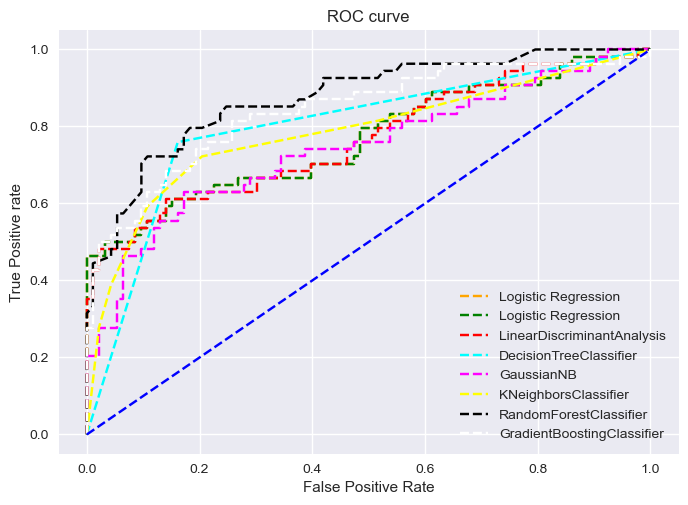

In [122]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='LinearDiscriminantAnalysis')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='DecisionTreeClassifier')
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='GaussianNB')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='KNeighborsClassifier')
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='RandomForestClassifier')
plt.plot(fpr8, tpr8, linestyle='--',color='white', label='GradientBoostingClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();